Business Objective : To develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan.

**Minimize** : Fraudulent transactions

**Maximize** : Profit and security

### Data Dictionary

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [ ]:
data = pd.read_csv("Fraud.csv")

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis (EDA)

In [ ]:
# Shape of dataset
data.shape

(6362620, 11)

In [ ]:
# Checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### There are no missing values in the dataset

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

### There are no duplicate rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Since the output feature is categorical(Fraud or not), we will check for data imbalance

In [ ]:
fraud_count = data['isFraud'].value_counts()
fraud_count

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
percentages = data['isFraud'].value_counts(normalize=True) * 100
percentages

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

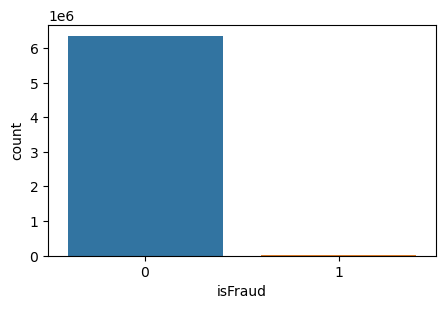

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data['isFraud'])

### From the graph above we can see that the data is highly imbalanced. We need to make it balance for right predictions.

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


### Checking Collerelation Between Columns

In [ ]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


<AxesSubplot:>

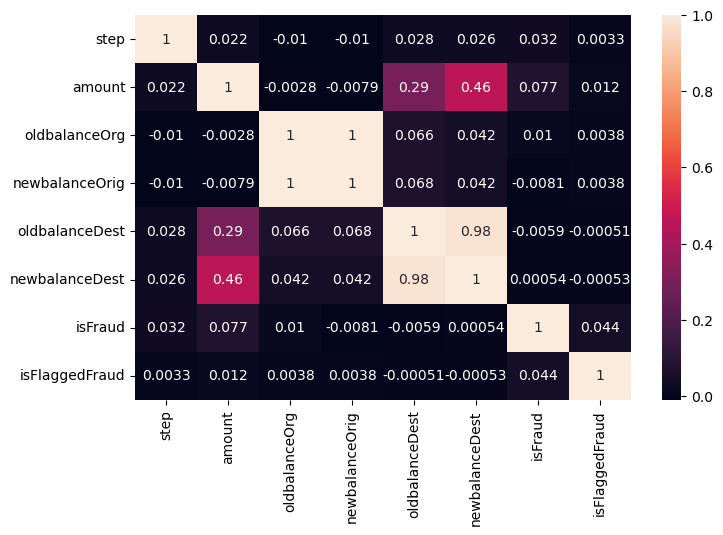

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)

### From the above graph, there is multi-collinearity between oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest

### In this case, we can have one of the two coulmns to solve the multicollinearity problem.

In [ ]:
#chcking the unique values in each column
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

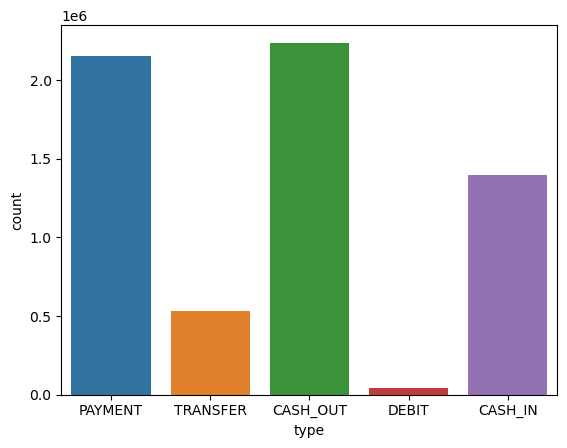

In [ ]:
# Types of transactions
sns.countplot(data['type'])

### Types of transactions where fraud occurs

In [ ]:
data[data['isFraud']==1].groupby('type')['isFraud'].count()

type
CASH_OUT    4116
TRANSFER    4097
Name: isFraud, dtype: int64

### Fradulant transactions only occurs in cash out and transfer transactions

In [ ]:
ct = data[data['type'].isin(['CASH_OUT','TRANSFER'])]

In [ ]:
fraud_in_cash = ct[ct['type'] == 'CASH_OUT']
fraud_in_cash[fraud_in_cash['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0


### In fraudulant transactions of type cash out, it's noticed that the origin balance goes back to zero after the cash out

In [ ]:
fraud_in_transfer = ct[ct['type'] == 'TRANSFER']
fraud_in_transfer[fraud_in_transfer['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


### In Fraudulant transaction of type transfer it's noticed that the whole amount in the account of origin is emptied, with no access on Destination balance

# Feature Engineering

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Using label encoder for the nameOrig and nameDest columns to numerical values
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
data["type"]=label.fit_transform(data["type"])
data["nameOrig"]=label.fit_transform(data["nameOrig"])
data["nameDest"]=label.fit_transform(data["nameDest"])

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [ ]:
# Independent and dependent variable
X = data.drop(columns=['isFraud'])
y = data['isFraud']

### Blancing the dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state=0)
X,y = over_sample.fit_resample(X,y)

In [ ]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(8896169, 10)

In [ ]:
y_train.shape

(8896169,)

In [ ]:
# we need to feature scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [ ]:
# Performance measures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
def printScores(y_test, y_pred):
    print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
    print('accuracy_score',accuracy_score(y_test, y_pred))
    print('Recall_score',recall_score(y_test, y_pred))
    print('precision_score',precision_score(y_test, y_pred))
    print('f1_score',f1_score(y_test,y_pred))

## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

#### Performance on Test data

In [ ]:
pred = log_reg.predict(X_test)

In [ ]:
printScores(y_test,pred)

Confusion matrix:
 [[1829465   76844]
 [  81198 1825138]]
accuracy_score 0.9585479371932084
Recall_score 0.9574062494754335
precision_score 0.9595979352065371
f1_score 0.9585008394782158


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96   1906309
           1       0.96      0.96      0.96   1906336

    accuracy                           0.96   3812645
   macro avg       0.96      0.96      0.96   3812645
weighted avg       0.96      0.96      0.96   3812645



#### Performance on Train data

In [ ]:
pred_train = log_reg.predict(X_train)

In [ ]:
printScores(y_train,pred_train)

Confusion matrix:
 [[4268420  179678]
 [ 188703 4259368]]
accuracy_score 0.958591051946068
Recall_score 0.9575764415630955
precision_score 0.9595232849580744
f1_score 0.9585488747363179


In [ ]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96   4448098
           1       0.96      0.96      0.96   4448071

    accuracy                           0.96   8896169
   macro avg       0.96      0.96      0.96   8896169
weighted avg       0.96      0.96      0.96   8896169



### We got an accuracy of 96% in both training and testing. It means that the model is a right fit and not overfitting.


# Let us flag the possible fraud situations:

### First possible fraud flag:
In fraudulent transactions, the origin account is completely emptied out

So we should take into account that if the newbalance becomes zero after cash out or transfer, it might be fraudulent

### Second possible fraud flag:
Similarly, in fraudulent transactions, the newbalance in the destination account does not increase at all

Means newbalance change in Destination is zero whether the transaction is transfer or cashout